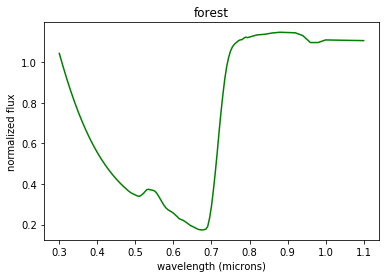

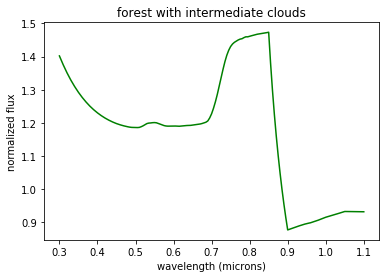

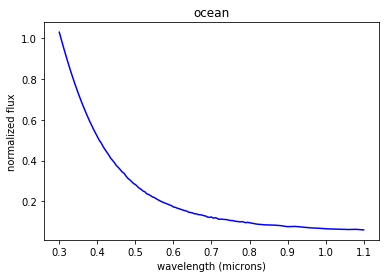

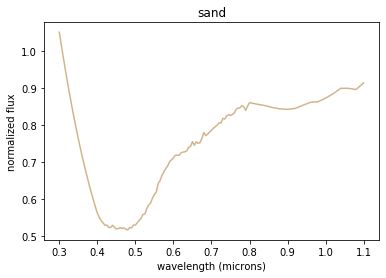

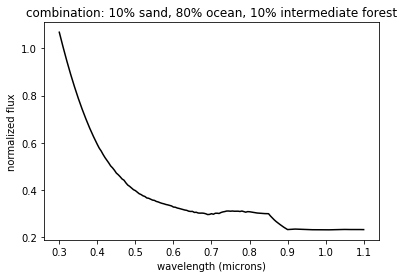

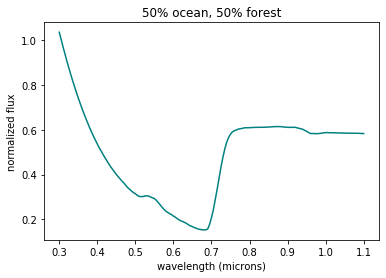

In [3]:
"""
Ryan Luk
ASTR 9A, 9B

BASIC PLOTS AND COMBINATIONS
[Final Draft]

These are some basic plots of the 'known' spectra. Biomes include: forest, ocean, grass, sand, and ice.
Each biome has varying cloud densities, translated into different flux values within each biome.
Features can be seen in the plots, examples:
    - more blue colors in the ocean biome
    - green 'bump' in forest biome
    - clouds increase flux reflected but can still show some features

"""

# chi-squared statistic, numpy, plot
from scipy.stats import chisquare
import numpy as np
import matplotlib.pyplot as plt

# regular forest, ocean, sand spectra
# forest with intermediate clouds
forestA44 = np.loadtxt('spectra/forest_clear_a44.dat')
ocean_clear = np.loadtxt('spectra/ocean_clear_atmosphere.dat')
sandA44 = np.loadtxt('spectra/sand_clear_a44.dat')
forestInter = np.loadtxt('spectra/forest_intermediate_clouds.dat')

# x-axis (same for all biome spectra)
# wavelength
f1axis = forestA44[:,0]

# normalized flux values
forest1 = forestA44[:,1]
ocean = ocean_clear[:,1]
sand = sandA44[:,1]
forestI = forestInter[:,1]

# regular forest
plt.plot(f1axis, forest1, color = 'green')
plt.title("forest")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()

# intermediate forest
plt.plot(f1axis, forestI, color = 'green')
plt.title("forest with intermediate clouds")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()

# regular ocean
plt.plot(f1axis, ocean, color = 'blue')
plt.title("ocean")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()

# regular sand
plt.plot(f1axis, sand, color = 'tan')
plt.title("sand")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()

# combination
# 10% sand, 80% ocean, 10% intermediate forest
model1 = (1/10)*sand + (8/10)*ocean + (1/10)*forestI
plt.plot(f1axis, model1, color = 'black')
plt.title("combination: 10% sand, 80% ocean, 10% intermediate forest")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()

# combination
# 50% ocean, 50% intermediate forest
model2 = (5/10)*ocean + (5/10)*forest1
plt.plot(f1axis, model2, color = 'teal')
plt.title("50% ocean, 50% forest")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()


EARTH-LIKE EXOPLANET
CHI-SQUARED:  0.00016653254008174408
SAND    OCEAN   FORESTI
[(array([1], dtype=int64), array([8], dtype=int64), array([1], dtype=int64))]
Represents 10% sand, 80% ocean, 10% intermediate forest

MARS-LIKE EXOPLANET
CHI-SQUARED:  0.0003802558941644519
Combination is 100% sand


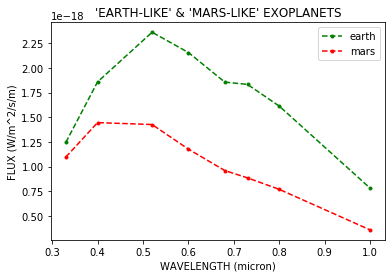

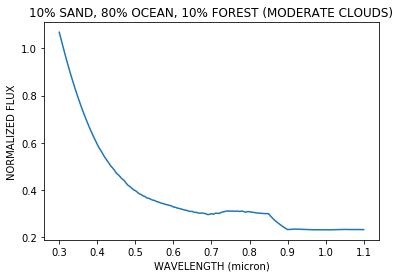

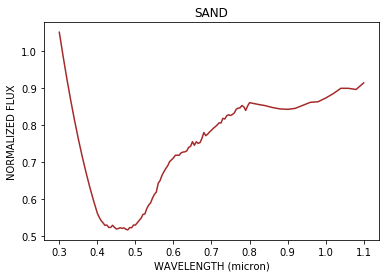

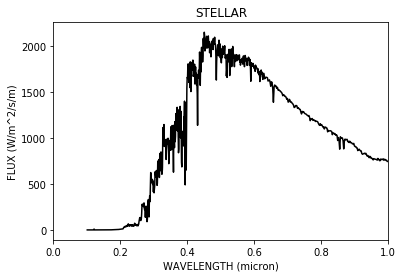

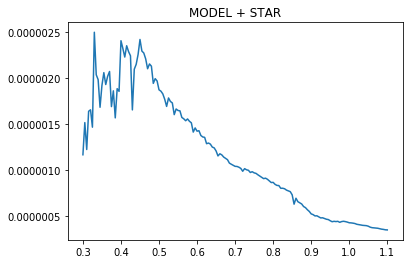

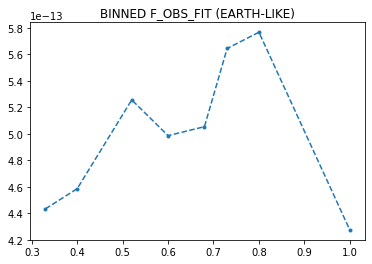

In [49]:
"""
Ryan Luk
ASTR 9A, 9B

EARTH-LIKE AND MARS-LIKE EXOPLANETS WITH GAUSSIAN AND STELLAR
[Final Draft]

Binning

"""

# chi-squared statistics, interpolate, numpy, plot, math
from scipy.stats import chisquare
from scipy.interpolate import interp1d as interpolate
import numpy as np
import matplotlib.pyplot as plt
import math

#Earth/Mars gaussian
#interpolate to larger data set
#chi-square with gaussian distribution
#ijk = 10

# earth, mars data
# stellar spectrum data
earthfile = np.loadtxt('spectra/exoplanet_earth_1Re_4pc.dat')
marsfile = np.loadtxt('spectra/exoplanet_mars_2Re_4pc.dat')
stellarfile = np.loadtxt('spectra/stellar_spectrum.dat')

# x-axis
# wavelength
earthaxis = earthfile[:,0]
# normalized flux values
earth = earthfile[:,1]

marsaxis = marsfile[:,0]
mars = marsfile[:,1]

stellaraxis = stellarfile[:,0]
stellar = stellarfile[:,1]

# mentor told me in advance these are the biomes that were used
# these biomes make sense
# earth: forests, oceans, some sand
# mars: lots of sand
forestA44 = np.loadtxt('spectra/forest_clear_a44.dat')
ocean_clear = np.loadtxt('spectra/ocean_clear_atmosphere.dat')
sandA44 = np.loadtxt('spectra/sand_clear_a44.dat')
forestInter = np.loadtxt('spectra/forest_intermediate_clouds.dat')

# x-axis (same for all biome spectra)
# wavelength
f1axis = forestA44[:,0]

# normalized flux values
forest1 = forestA44[:,1]
ocean = ocean_clear[:,1]
sand = sandA44[:,1]
forestI = forestInter[:,1]

# gaussian equation
def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2) / (2*np.power(sigma, 2)))

# grid for all of the errors
# new grid for each i,j,k combination
grid = np.zeros([9,9,9])
for x in range(9):
    for y in range(9):
        for z in range(9):
            grid[x][y][z] = 1000000
    
# minimum chi-value for all i,j,k combinations
chi_values = []
# indicies for minimum value
# this is the i,j,k values
chi_where = []
exp_obs = []
# if you want to print an example gaussian
print_gauss = False

# function that allows interpolation
# since the stellar axis doesn't always match the wavelength axis
function = interpolate(stellaraxis, stellar)
stellar_interpolation = []
for a in range(len(f1axis)):
    stellar_interpolation.append(function(f1axis[a]))
# values of stellar corresponding to the wavelength axis values

# goes through each 10% combination (sand, ocean, intermediate forest)
for i in range(1,9):
    for j in range(1,9):
        for k in range(1,9):
            
            # we want the combination adding up to 100%
            if(i+j+k == 10):
                
                # my mentor told me the biomes beforehand
                # this makes sense for earth: sand, ocean, forests
                combination = sand*(i/10) + ocean*(j/10) + forestI*(k/10)
                
                # the constant represents a portion of photons coming from the star
                # (r^2)/(4d^2) is blocked by the planet
                # flux is dependent on area, think of a cone going from us to the star
                # 1 earth radius = 2.067020883**-10 parsecs
                # 4 parsecs away
                # (for this exoplanet)
                constant = (1/4)*((2.067020883**-10)**2/16)
                
                # the constant multiplied by our star's spectra is the flux hitting our planet
                flux = []
                for b in range(len(stellar_interpolation)):
                    flux.append(constant*stellar_interpolation[b])
                    
                # we compare this to the observations
                # our flux of the planet times the combination, gives us a calculated spectra
                # the combination of biomes is like a cookie cutter, telling us how
                # the flux is distributed
                model = flux*combination
                
                # goes through each earth point
                for c in range(len(earthaxis)):
                    
                    # creates gaussian with different center
                    gauss = gaussian(f1axis, earthaxis[c], 0.01)
                    
                    # we pass our model through a gaussian (at each point) and sum it
                    exp_obs.append(sum(gauss*model))
                    
                    # example distribution at the first bin center
                    if(print_gauss):
                        plt.plot(f1axis, gaussian(f1axis, earthaxis[c+1], 0.01))
                        plt.xlim(earthaxis[c+1]-0.1, earthaxis[c+1]+0.1)
                        plt.title("example gaussian distribution")
                        plt.show()
                        print_gauss = not print_gauss
                        
                # we sum the errors (representing each point along the x-axis there is a flux obs)
                # for this particular combination, and run another combination
                grid[i][j][k] = chisquare(earth, exp_obs)[0]
                exp_obs = []

chi_values.append(np.min(grid))
chi_where.append(np.where(grid == np.min(grid)))
    
print()
print("EARTH-LIKE EXOPLANET")
print("CHI-SQUARED: ", chi_values[0])
print("SAND    OCEAN   FORESTI")
print(chi_where)
print('Represents 10% sand, 80% ocean, 10% intermediate forest')

#####
    
constant = ((1/(4*math.pi)))*((2*2.067020883**-10)**2/16)

flux = []

for e in range(len(final)):
    flux.append(constant*stellar_interpolation[e])
model = flux*sand

for b in range(len(marsaxis)):
    gauss = gaussian(f1axis, marsaxis[b], 0.01)
    exp_obs.append(sum(gauss*model))
    
print()
    
print("MARS-LIKE EXOPLANET")
print("CHI-SQUARED: ", chisquare(mars, exp_obs)[0])
print('Combination is 100% sand')

#####

y_errors1 = earthfile[:,2]
y_errors2 = marsfile[:,2]

plt.plot(earthaxis, earth, '.', linestyle = '--', color = 'green', label = 'earth')
plt.plot(marsaxis, mars, '.', linestyle = '--', color = 'red', label = 'mars')
plt.legend(loc = 'upper right')
plt.title("'EARTH-LIKE' & 'MARS-LIKE' EXOPLANETS")
plt.xlabel("WAVELENGTH (micron)")
plt.ylabel("FLUX (W/m^2/s/m)") #last meter is for the wavelength bin
plt.show()

new = (1/10)*sand + (8/10)*ocean + (1/10)*forestI
plt.title("10% SAND, 80% OCEAN, 10% FOREST (MODERATE CLOUDS)")
plt.plot(f1axis, new)
plt.xlabel("WAVELENGTH (micron)")
plt.ylabel("NORMALIZED FLUX") 
plt.show()

plt.title("SAND")
plt.plot(f1axis, sand, color = 'brown')
plt.xlabel("WAVELENGTH (micron)")
plt.ylabel("NORMALIZED FLUX") 
plt.show()

plt.title("STELLAR")
plt.plot(stellaraxis, stellar, color = 'black')
plt.xlim(0,1)
plt.xlabel("WAVELENGTH (micron)")
plt.ylabel("FLUX (W/m^2/s/m)") 
plt.show()

constant = ((1/(4*math.pi)))*((2.067020883**-10)**2/16)

F_obs = stellar_interpolation*new*constant
plt.title("MODEL + STAR")
plt.plot(f1axis, F_obs)
plt.show()

plt.title("BINNED F_OBS_FIT (EARTH-LIKE)")
star = []
for b in range(len(earthaxis)):
    star.append(function(earthaxis[b])*constant)
plt.plot(earthaxis, earth/star , '.', linestyle = '--')
plt.show()



In [50]:
import math
import numpy as np
from scipy.integrate import quad

#T = 3042K
#m star interesting features, using black body to make it simple
#nu = freq, can just convert
#error bars - make them bigger and bigger until it gets the wrong answer

def planck(x):#, h, c, k, T):
    
    # T = temperature
    # h = planck constant
    # c = speed of light
    # k = boltzmann constant
    
    T = 3042
    h = 6.626*(10**-34)
    c = 3*(10**10)
    k = 1.38*(10**-23)
    #x = x*100
    
    #x = x
    c = 3*(10**8)
    
    
    #print("WAVELENGTH: ", x)
#    print("T: ", T, "h: ", h, "c: ", c, "k: ", k)
    #one = 2*h*x**3/(c**2)
#    one = (2*(8.617*(10**-5))*(x**3)/((3*(10**8))**2))
#    p1 = (8.617*(10**-5))*x
    #p1 = h*x
#    p2 = (4.316*(10**-15))*5778
    #p2 = k*T
#    print("p1 ", p1, "p2 ", p2, "one ", one)
    #p3 = math.exp(p1/p2)-1.
    #two = (1/p3)
#    E = (8.617*(10**-5))*(3*(10**8))/((3*(10**8))/x)
    #E = h*x
    
    # planck function based on wavelength
    
    one = (2*h*c**2)/(x**5)
    p1 = h*c
    p2 = x*k*T
    p3 = math.exp(p1/p2)-1
    two = (1/p3)
    E = h*c/x
    
    # returns number of photons in wavelength bin
    
    return one*two/E

# frequency bounds in SI
bound1 = c/(0.36*(10**-6))
bound2 = c/(0.51*(10**-6))
#print(bound1, bound2)

# wavelength bounds in SI
bound1 = (0.285*(10**-6))
bound2 = (0.435*(10**-6))

I, err = quad(planck, bound1, bound2)#, args = (h, c, k, T))
print("FULL BOUND (number of photons): ", I)

forestA44 = np.loadtxt('spectra/forest_clear_a44.dat')
ocean_clear = np.loadtxt('spectra/ocean_clear_atmosphere.dat')
sandA44 = np.loadtxt('spectra/sand_clear_a44.dat')
forestInter = np.loadtxt('spectra/forest_intermediate_clouds.dat')

f1axis = forestA44[:,0]

forest1 = forestA44[:,1]
ocean = ocean_clear[:,1]
sand = sandA44[:,1]
forestI = forestInter[:,1]

stellarfile = np.loadtxt('spectra/stellar_spectrum.dat')

stellaraxis = stellarfile[:,0]
stellar = stellarfile[:,1]

def gaussian(x, mu, sigma):
    """
    mu is line center, sigma is width of band, x is exact wavelength we want to evaluate at
    """
    return np.exp(-np.power(x - mu, 2) / (2*np.power(sigma, 2)))

def observation(wavelength):
    
    #luvoir
    #0.3-1, U to J band
    orbit = 7.48*10**9
    
    radius_planet = 6371393
    distance = 4*10**16
    detector_size = 15

    ratio = (radius_planet**2)/(distance**2)/(math.pi*4)
    planet2telescope = (detector_size**2)/(2*distance**2)

    #MODEL
    model = (1/10)*sand + (8/10)*ocean + (1/10)*forestI
    function = interpolate(f1axis, model)
    F_model = function(wavelength*1000000)

    #GAUSSIAN
    F_gauss = gaussian(wavelength, 0.36*10**-6, 0.01*10**-6)
    print(wavelength)

    #STAR AND RATIOS
    F_star = planck(wavelength)*ratio*planet2telescope
    
    integral = F_model*F_star*F_gauss
    #print(integral)
    
    return integral

U_band, err = quad(observation, (0.3*10**-6), (0.435*10**-6))
print(U_band)

#convert to SI units
#evaluate planck at f1axis wavelengths only


FULL BOUND (number of photons):  1.4950922455501876e+22
3.675e-07
3.017613093250909e-07
4.3323869067490907e-07
3.0910822274849353e-07
4.258917772515064e-07
3.216398541398158e-07
4.1336014586018413e-07
3.382458108962758e-07
3.9675418910372417e-07
3.5745098211873986e-07
3.775490178812601e-07
3.002931414957579e-07
4.3470685850424204e-07
3.047143693334897e-07
4.3028563066651027e-07
3.1479480345541683e-07
4.202051965445831e-07
3.2951389340986916e-07
4.054861065901308e-07
3.476284817676514e-07
3.8737151823234856e-07
1.852284653237529e-31
